In [2]:
#Installing dependent libraries

!pip install opendatasets
!pip install pandas
!pip install -q kaggle
!pip install tensorflow
!pip install keras

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Insert your folder path for zipped dataset here
zip_file_path = r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALL-Class-16-Group-2/ASL Dataset.zip"

In [5]:
#switching to dataset directory
!unzip  "{zip_file_path}" -d /content/ASLDataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2863).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2864).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2865).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2866).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2867).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2868).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2869).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (287).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/space/space (2870).jpg  
  inflating: /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_t

/content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_test


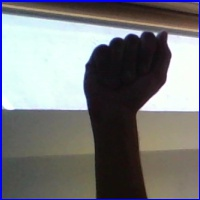

In [6]:
%cd /content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_test

#testing dataset
from IPython.display import Image
Image('A_test.jpg')

In [7]:
%cd ../asl_alphabet_train

#initialize class names for classification
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space', 'nothing', 'del']
#label class names with numbers corresponding to each class in a dictionary format (0-26)
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

#defining image size in dataset
IMAGE_SIZE = (200, 200)

#print class names with corresponding numerical label
print(class_names_label)

/content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'space': 26, 'nothing': 27, 'del': 28}


In [8]:
#Importing library dependencies
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tqdm import tqdm
import shutil
from math import ceil
from sklearn.model_selection import train_test_split
import json
from tensorflow.keras.models import load_model

Text(0.5, 1.0, 'del')

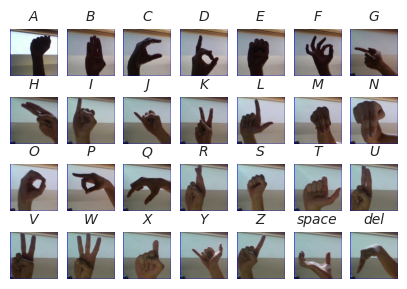

In [9]:
plt.figure(figsize=(5,6))

testFolderBasePath = r"/content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_test/"
for i in range(len(class_names)-1): #Leaving out del cuz no del test image
  path = testFolderBasePath + class_names[i] + "_test.jpg"
  img = plt.imread(path)
  plt.subplot(7,7,i+1)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title(class_names[i], fontsize=10, fontstyle='italic')
  plt.axis("off")

img = plt.imread(r'/content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/del/del1.jpg')
plt.subplot(7,7,i+1)
plt.imshow(img)
plt.title("del", fontsize=10, fontstyle='italic')

In [ ]:
!ls

asl_alphabet_test  asl_alphabet_train


In [10]:
#Splitting data using python into train and test directories

# Define the dataset directory
dataset_dir = r"/content/ASLDataset/ASL_Alphabet_Dataset/asl_alphabet_train/"
train_dir = r"/content/ASLDataset/ASL_Alphabet_Dataset/asl_train/"
test_dir = r"/content/ASLDataset/ASL_Alphabet_Dataset/asl_test/"

# Create directories for train/test splits
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split data for each class
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Get all files in the class folder
        files = os.listdir(class_path)
        train_files, test_files = train_test_split(files, test_size=0.2, random_state=123)

        # Move files to train/test folders
        for file in train_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))
        for file in test_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(test_class_dir, file))
!ls

A  B  C  D  del  E  F  G  H  I	J  K  L  M  N  nothing	O  P  Q  R  S  space  T  U  V  W  X  Y	Z


In [ ]:
!ls asl_test

A  B  C  D  del  E  F  G  H  I	J  K  L  M  N  nothing	O  P  Q  R  S  space  T  U  V  W  X  Y	Z


In [ ]:
!ls asl_train

A  B  C  D  del  E  F  G  H  I	J  K  L  M  N  nothing	O  P  Q  R  S  space  T  U  V  W  X  Y	Z


In [11]:
# Load training dataset (80%)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    r"/content/ASLDataset/ASL_Alphabet_Dataset/asl_train",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    color_mode = "grayscale",
    batch_size=32
)

# Load validation dataset (20%)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    r"/content/ASLDataset/ASL_Alphabet_Dataset/asl_train", # Path to the dataset directory
    validation_split=0.2,        # Reserve 20% for validation
    subset="validation",         # Use this subset for validation
    seed=123,                    # Same seed as training
    image_size=(150, 150),       # Resize images to 150x150
    color_mode = "grayscale",    # Change image color to grayscale
    batch_size=32                # Batch size
)

# Load testing dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    r"/content/ASLDataset/ASL_Alphabet_Dataset/asl_test",
    image_size=(150, 150),
    color_mode = "grayscale",
    batch_size=32
)

Found 178447 files belonging to 29 classes.
Using 142758 files for training.
Found 178447 files belonging to 29 classes.
Using 35689 files for validation.
Found 44627 files belonging to 29 classes.


In [12]:
#Normalizing images to have values from [0, 1] instead of [1, 255]
from tensorflow.keras.layers import Rescaling

normalization_layer = Rescaling(1.0 /255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [13]:
#Optimize performance by using prefetching
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
#Creating CNN with keras
#This CNN has:
#1 hidden layer
#Input layer = convolution layer -> also followed by MaxPoolingLayer
#Hidden layer of another convolution layer & MaxPoolingLayer
#flatten outputs to reduce the number of features and have an output layer consisting of a dense relu layer & dense softmax layer
model = tf.keras.models.Sequential([
    # Input layer (no need to specify input_shape if it's the first layer)
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(150, 150, 1)),
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid'),
    tf.keras.layers.Dropout(0.4),

    # Flatten the feature maps before passing to dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # Output layer with softmax activation for classification
    tf.keras.layers.Dense(29, activation='softmax')  # Assuming 27 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Compile CNN model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
#Show model summary
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │          14,877 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,535,485 (82.15 MB)

 Trainable params: 21,535,485 (82.15 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#define keras callback functions to stop early & reduce training when notcing no increase in accuracy

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)


In [18]:
#Test that model works with 1 fast epoch
testing = model.fit(train_dataset, epochs=1, validation_data=val_dataset, steps_per_epoch=10, validation_steps=10, callbacks=[early_stopping, reduce_learning_rate], verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 7s/step - accuracy: 0.0346 - loss: 3.4376 - val_accuracy: 0.0188 - val_loss: 3.3671 - learning_rate: 0.0010


In [19]:
#Actually training the model
history = model.fit(train_dataset, epochs=1, validation_data=val_dataset, callbacks=[early_stopping, reduce_learning_rate], verbose=1)

Epoch 1/30
 326/4462 ━━━━━━━━━━━━━━━━━━━━ 6:57:48 6s/step - accuracy: 0.0376 - loss: 3.3635

KeyboardInterrupt: 

In [24]:
#Saving preprocessed datasets for use later
def serialize_data(image, label):
    """
    Serialize image and label into a TFRecord-compatible format.
    """

    # Scale and convert the image to uint8
    image_uint8 = tf.cast(image * 255.0, tf.uint8)

    feature = {
        "image": tf.train.Feature(bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(image_uint8).numpy()])),
        "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[label.numpy()])),
    }
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    return example.SerializeToString()

def save_as_tfrecord(dataset, file_path):
    """
    Save a TensorFlow dataset to a TFRecord file.
    """
    with tf.io.TFRecordWriter(file_path) as writer:
        for image_batch, label_batch in dataset:
            for image, label in zip(image_batch, label_batch):
                writer.write(serialize_data(image, label))

# Save datasets
save_as_tfrecord(train_dataset, r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/train_dataset.tfrecord")
save_as_tfrecord(val_dataset, r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/val_dataset.tfrecord")
save_as_tfrecord(test_dataset, r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/test_dataset.tfrecord")


In [26]:
# Save the model to an HDF5 file
model_path = r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/ASL_Model.keras"
model.save(model_path)

In [ ]:
# Save history to JSON file
def save_history_to_json(history, file_path):
    with open(file_path, 'w') as f:
        json.dump(history.history, f)

# Example usage
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Save history to a JSON file
save_history_to_json(history, r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/training_history1.json")

In [30]:
#Reload data & model from last session for continued training/testing
# Load the model back
model = load_model(model_path)

# Load the model back
model = load_model(model_path)

def parse_tfrecord(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64),
    }
    parsed_example = tf.io.parse_single_example(example, feature_description)
    image = tf.io.decode_jpeg(parsed_example["image"])
    label = parsed_example["label"]

    # Resize image to the expected size (150x150)
    image = tf.image.resize(image, (150, 150))

    # Normalize image
    image = tf.cast(image, tf.float32) / 255.0

    return image, label

def load_from_tfrecord(file_path, batch_size=32):
    dataset = tf.data.TFRecordDataset(file_path)
    dataset = dataset.map(parse_tfrecord)
    dataset = dataset.batch(batch_size)  # Add batching
    return dataset

# Reload datasets
train_dataset = load_from_tfrecord(r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/train_dataset.tfrecord")
val_dataset = load_from_tfrecord(r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/val_dataset.tfrecord")
test_dataset = load_from_tfrecord(r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/test_dataset.tfrecord")

In [32]:
#Count num iterations per epoch
def count_examples(file_path):
    dataset = tf.data.TFRecordDataset(file_path)
    count = 0
    for _ in dataset:
        count += 1
    return count

num_train_examples = count_examples(r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/train_dataset.tfrecord")
num_val_examples = count_examples(r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/val_dataset.tfrecord")

steps_per_train_epoch = num_train_examples // 32
steps_per_val_epoch = num_val_examples // 32

In [33]:
#Reload callback functions
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

In [34]:
#Test Model again for 1 fast epoch
testing = model.fit(train_dataset, epochs=1, validation_data=val_dataset, steps_per_epoch=10, validation_steps=10, callbacks=[early_stopping, reduce_learning_rate], verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 84s 8s/step - accuracy: 0.0339 - loss: 3.3532 - val_accuracy: 0.0188 - val_loss: 3.3582 - learning_rate: 0.0010


In [31]:
#Continue training model
history = model.fit(
    train_dataset,
    epochs=1,
    steps_per_epoch=steps_per_train_epoch,
    validation_data=val_dataset,
    validation_steps=steps_per_val_epoch,
    callbacks=[early_stopping, reduce_learning_rate],
    verbose=1
)

Epoch 1/30
     73/Unknown 517s 7s/step - accuracy: 0.0284 - loss: 3.3586

KeyboardInterrupt: 

In [ ]:
#Parsing model history afterwards:
# Load history from a JSON file
def load_history_from_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

history_data = load_history_from_json(r"/content/drive/MyDrive/TAMU Junior Year/AI4All/AI4ALLFinalProject/training_history1.json")
print(history_data)